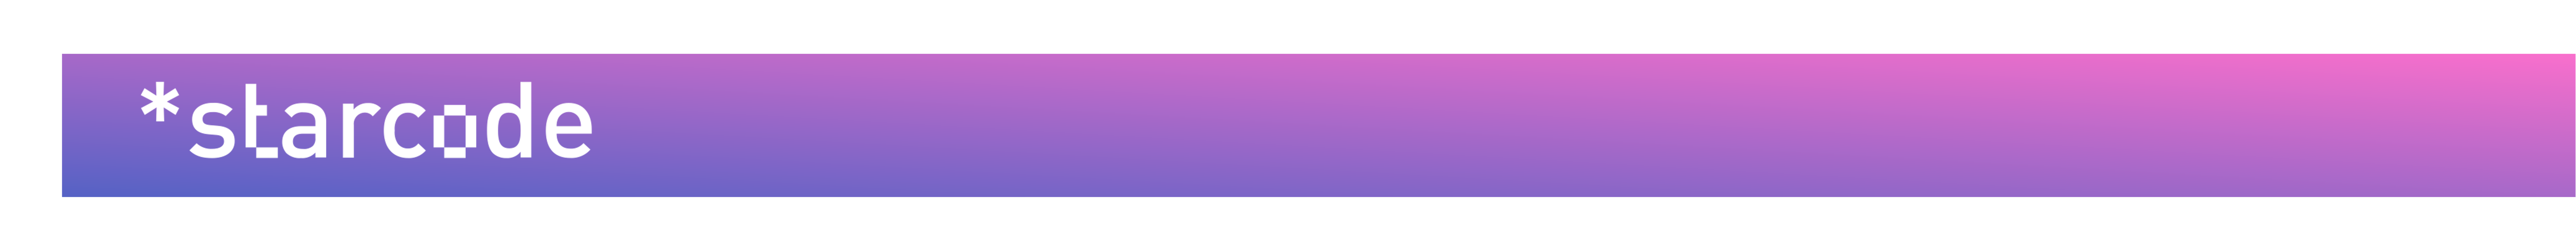



# **<span style="color: #6162C5;">Künstliche Intelligenz mit Python</span>  <span style="color: #7865C6;"> - Woche 8: Regression & Klassifikation (Lösung) </span>** &nbsp;

Willkommen in der achten Woche des Kurses 'Künstliche Intelligenz mit Python'. Nachdem wir uns letzte Woche damit beschäftigt haben, was hinter dem Begriff KI steckt und uns ein erstes Beispiel angeschaut haben, in welchem wir ein neuronales Netzwerk verwendet haben, um handgeschriebene Zahlen zu erkennen, wollen wir uns in dieser Woche mit zwei neuen Begriffen beschäftigen: *Regression* und *Klassifikation*. Diese Konzepte bilden nämlich die Grundlage der meisten Probleme, auf die künstliche Intelligenz angewendet werden kann.

In der *Regression* wird angestrebt, Zusammenhänge zwischen unterschiedlichen Variablen zu identifizieren und durch die Analyse dieser Beziehungen zukünftige Vorhersagen zu treffen. Dabei erstellt der Computer Modelle, um Muster in Daten zu finden und dann genaue Vorhersagen für Zahlen zu machen.  Ein anschauliches Beispiel hierfür ist die Prognose des Verkehrsaufkommens mithilfe historischer Verkehrsdaten. Wenn der Computer diese Daten analysiert, kann er nicht nur Muster im täglichen Verkehrsaufkommen identifizieren, sondern auch Faktoren wie Wetterbedingungen, Veranstaltungen oder Baustellen berücksichtigen. Auf dieser Grundlage kann das Modell dann Vorhersagen darüber treffen, wie stark der Verkehr zu bestimmten Zeiten in der Zukunft sein wird.

Bei der *Klassifikation* versucht man hingegen, Dinge in verschiedene Gruppen zu teilen. Anhand von Eigenschaften von Objekten versucht der Computer dann zu entscheiden, wo dieses Objekt dann einzuteilen ist. Erinnert ihr euch an unsere Software zur Erkennung von Pinguingesichtern? Das wäre ein Beispiel für eine Klassifikationsaufgabe, da der Computer anhand eines Bildes versucht zu erkennen, ob es sich hierbei um einen Pinguin oder ein anderes Tier handelt. 

In dieser und in den nächsten Wochen werden wir die Bibliothek Scikit-learn verwenden. Sie ermöglicht es, verschiedene Machine-Learning-Modelle einfach zu erstellen, zu trainieren und zu verwenden, und ist daher besonders für Einsteiger geeignet. Wie in den Wochen zuvor verwenden wir auch noch zusätzlich NumPy und Matplotlib:

In [ ]:
! pip install numpy matplotlib scikit-learn

## <span style="color: #9C68C8;">Lineare Regression</span>

Im Rahmen eures Mathematikunterrichts habt ihr bestimmt schon einmal die *lineare Funktion* kennengelernt. Diese lässt sich wie folgt darstellen:
$$
f(x) = m\cdot x + c
$$
wobei der Parameter $m$ die Steigung der Geraden, und der Parameter $c$ der y-Achsenschnittpunkt ist. Genauso kennt ihr vielleicht auch schon quadratische Funktionen $f(x)=x^2$, kubische Funktionen $f(x)=x^3$, usw. Wenn wir jetzt einen Datensatz haben, in dem wir wissen, welcher Zusammenhang, also welche Funktion dahinter steckt, aber nicht wissen, welche Werte die Parameter (z.b. $m$ und $c$) einnehmen, dann können wir *lineare Regression* verwenden.

Der Begriff *lineare Regression* kann ein bisschen irreführend sein. Diese Methode kann nämlich nicht nur auf *lineare* Funktionen angewendet werden. Vielmehr steht hier das *linear* für die Linearität der Koeffizienten oder Zahlen, die wir verwenden, um Beziehungen zwischen verschiedenen Dingen zu beschreiben. Auch wenn die Beziehung zwischen den Dingen wie eine Kurve aussieht (wie bei einer kubischen oder quadratischen Funktionen), sind die Zahlen, die wir benutzen, immer noch auf einfache Weise miteinander verbunden, und deshalb nennen wir es '*linear*'. 

Der erste Schritt in der Anwendung der Linearen ist es also, den Zusammenhang zwischen den Daten zu erkennen. Schauen wir uns das ganze mal an einem Beispiel an!

**<span style="color: #EB6ECB;">Aufgabe 8.1:</span>** *Manchmal hat man so Momente im Leben, wo man sich denkt: 'Ich brauche eine neue Frisur!'. Allerdings ist das immer schwierig... Wenn man lange Haare möchte, dann ist die Frage wie lange das brauchen würde... Wenn man kurze Haare möchte, dann muss man ja warten bis die Haare zurück gewachsen sind, wenn es einen nicht gefällt... Du findest Online Liste von Messungen, die ein paar Leute aufgestellt haben, indem sie ihr Haarwachstum alle paar Monate gemessen haben. Nutze deine Kenntnisse, um die Daten mit Matplotlib zu visualisieren und überlege dir dann gemeinsam in der Gruppe, welche Funktion denn die Daten am besten beschreibt (linear? quadratisch? kubisch? ...).*

Text(0, 0.5, 'Haarlänge [cm]')

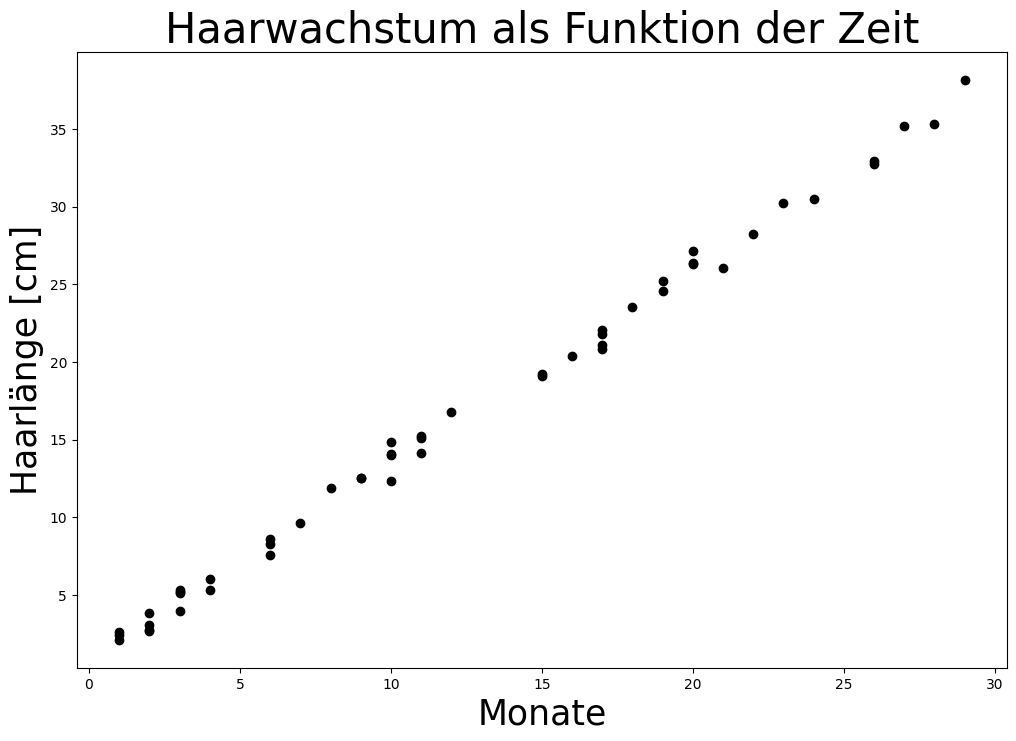

In [2]:
# Musterlösung

import numpy as np

monat = np.array([1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 6, 6, 6, 7, 8, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 15, 15, 16, 17, 17, 17, 17, 18, 19, 19, 20, 20, 20, 21, 22, 23, 24, 26, 26, 27, 28, 29])
haarlänge = np.array([2.44, 2.59, 2.11, 2.71, 2.64, 3.09, 3.84, 3.96, 5.12, 5.17, 5.33, 5.34, 6.02, 7.57, 8.25, 8.57, 9.64, 11.9, 12.51, 12.53, 12.34, 14.01, 14.05, 14.85, 14.15, 15.1, 15.21, 16.75, 19.12, 19.25, 20.38, 20.83, 21.07, 21.79, 22.06, 23.56, 24.56, 25.23, 26.32, 26.38, 27.15, 26.07, 28.21, 30.2, 30.51, 32.72, 32.94, 35.19, 35.3, 38.17])

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(monat, haarlänge, c='black')
plt.title('Haarwachstum als Funktion der Zeit', fontsize=30)
plt.xlabel('Monate', fontsize=25)
plt.ylabel('Haarlänge [cm]', fontsize=25)

&emsp;→ *An diesem Datensatz ist es relativ gut zu sehen, dass wir einen linearen Zusammenhang haben, der durch die Funktion $f(x)=m\cdot x+c$ beschrieben werden kann!*

Der nächste Schritt ist es, die passenden Parameter zu finden, um unseren Datensatz zu beschreiben. Schaue dir zum Beispiel die folgenden Linien an, die eine beliebige Datenmenge beschreiben sollen:
<center><img src="https://cdn.githubraw.com/starcodecourses/Python-KI/PythonKI-V2/_starcode_Pythonkurs_Visuals/linear_fits.png" width="800" /></center> 
Welcher Fit mit welchen Parametern ist jetzt besser? Eins, zwei oder drei? Gar nicht so einfach zu sagen, oder? Das Ganze kann aber tatsächlich ziemlich einfach quantifiziert werden!

### <span style="color: #C26BCA;"> Fehlerbestimmung </span>

Um zu quantifizieren, wie gut unsere Linie die Daten beschreibt, können wir uns den Abstand zwischen unseren Datenpunkten $Y(x)$ und dem Wert der Linie an der gleichen Stelle $f(x)$ anschauen:
$$
|Y(x)-f(x)|.
$$

Grafisch kann man sich diese Abstände wie folgt vorstellen:
<center><img src="https://cdn.githubraw.com/starcodecourses/Python-KI/PythonKI-V2/_starcode_Pythonkurs_Visuals/linear_regression.png" width="800" /></center> 

Je besser unsere Linie die Daten beschreibt, desto näher sollten die beiden ja aneinander sein und desto kleiner sollte dieser Wert werden. Es genügt uns aber nicht, das Ganze für einen Datenpunkt zu tun, sondern wir summieren über alle Datenpunkte und bilden den Mittelwert (teilen das Ganze also durch die Anzahl $N$ an Datenpunkten):
$$
\frac{1}{N} \sum_x |Y(x)-f(x)| = \frac{1}{N} \cdot \big(|Y(x_1)-f(x_1)| + |Y(x_2)-f(x_2)| + |Y(x_3)-f(x_3)| + ... \big)
$$

🔎 <span style="color: #2E88B6;"> Das Zeichen $\sum$ ist das *Summenzeichen* und steht einfach nur dafür, dass wir über alle x-Werte summieren. Es ist eigentlich ziemlich vergleichbar mit der `np.sum()` Funktion in Python, die über alle Werte in einem Array summiert.</span>

Das war es auch fast schon! Diese Funktion soll uns ja sagen, wie gut unser unsere Gerade die Daten beschreibt. Würde die Gerade die Daten perfekt beschreiben, so wäre ja $|Y(x)-f(x)|=0$ für alle x-Werte, da jeder Datenpunkt $Y(x)$ perfekt durch die Funktion $f(x)$ beschrieben werden würde $Y(x)=f(x)$. Allerdings wollen wir größere Abstände stärker gewichten. Das können wir durch das Quadrieren der Abstände erzielen. Ist der Abstand klein, zum Beispiel $|Y(x_a)-f(x_a)|=2$, dann bleibt er klein durch das Quadrieren $(Y(x_a)-f(x_a))^2=4$. Ist der Abstand aber groß, zum Beispiel $|Y(x)-f(x)|=10$, so wird er durch das quadrieren nur noch größer $(Y(x_b)-f(x_b))^2=100$. Unsere endgültige Funktion sieht dann wie folgt aus:
$$
\frac{1}{N} \sum_x \big(Y(x)-f(x)\big)^2 = \frac{1}{N} \cdot \Big(\big(Y(x_1)-f(x_1)\big)^2 + \big(Y(x_2)-f(x_2)\big)^2 + \big(Y(x_3)-f(x_3)\big)^2 + ...\Big)
$$

Diese Funktion heißt *mittlere quadratische Abweichung* (engl. *mean squared error*, also MSE in der Kurzform). Wir werden das Ganze am besten gleich mal in der Praxis an:

**<span style="color: #EB6ECB;">Aufgabe 8.2:</span>** *Verändere die Werte `m` und `c` im folgenden Code und versuche den besten Fit der Geraden an die Daten zu finden. Im Titel des Plots wird der `MSE` Wert des aktuellen Fits gezeigt. Versuche, diesen zu minimieren!*

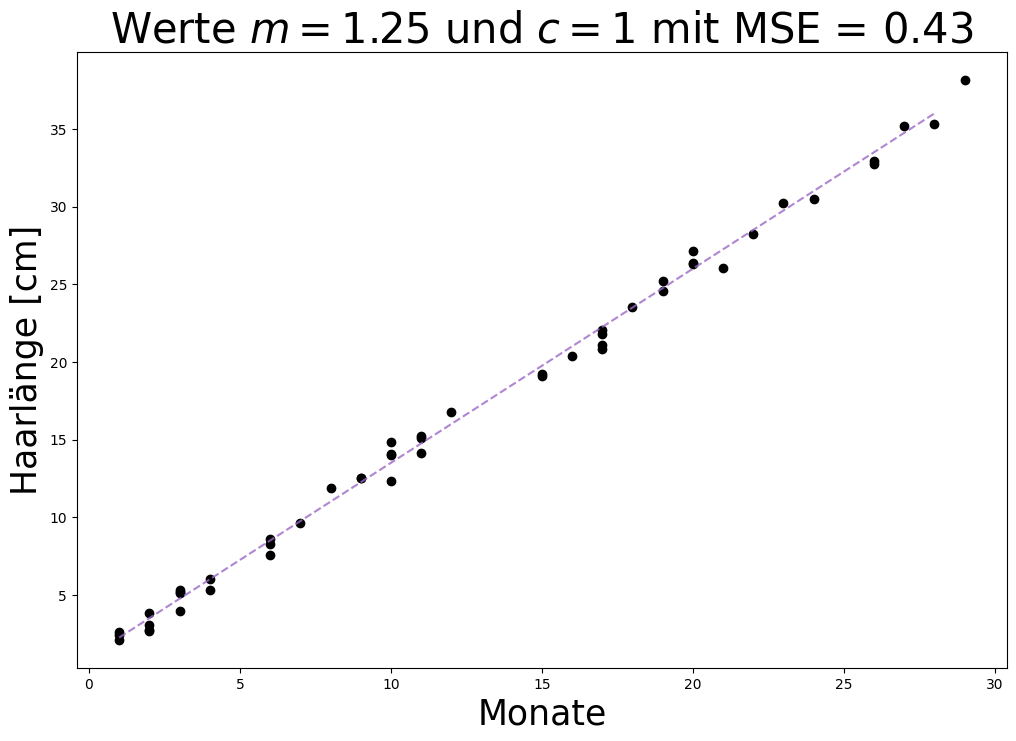

In [3]:
# Musterlösung

m = 1.25
c = 1

monat = np.array([1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 6, 6, 6, 7, 8, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 15, 15, 16, 17, 17, 17, 17, 18, 19, 19, 20, 20, 20, 21, 22, 23, 24, 26, 26, 27, 28, 29])
haarlänge = np.array([2.44, 2.59, 2.11, 2.71, 2.64, 3.09, 3.84, 3.96, 5.12, 5.17, 5.33, 5.34, 6.02, 7.57, 8.25, 8.57, 9.64, 11.9, 12.51, 12.53, 12.34, 14.01, 14.05, 14.85, 14.15, 15.1, 15.21, 16.75, 19.12, 19.25, 20.38, 20.83, 21.07, 21.79, 22.06, 23.56, 24.56, 25.23, 26.32, 26.38, 27.15, 26.07, 28.21, 30.2, 30.51, 32.72, 32.94, 35.19, 35.3, 38.17])

plt.figure(figsize=(12,8))
plt.scatter(monat, haarlänge, c='black')


def lin(x,m,c):
    return m*x+c

x_range = np.arange(min(monat), max(monat))
plt.plot(x_range, lin(x_range,m,c), c='#9C68C8', ls='--', alpha=.8)

plt.xlabel('Monate', fontsize=25)
plt.ylabel('Haarlänge [cm]', fontsize=25)

def MSE(beobachte_daten, vorhergesagte_daten):
    return np.sum(np.square(beobachte_daten-vorhergesagte_daten))/len(beobachte_daten)

MSE_Wert = MSE(haarlänge, lin(monat,m,c))
plt.title(r'Werte $m=$'+str(m)+r' und $c=$'+str(c)+' mit MSE = '+str(round(MSE_Wert,2)), fontsize=30)
plt.show()

*Hast du nun gute Parameter gefunden, dann können wir die Funktion umdrehen, also aus $f(x) = m \cdot x +c$ wird $x = \frac{(f(x)-c)}{m}$, um zu bestimmen, wie lange wir warten müssen, um unsere Haare eine bestimme Länge Wachsen zu lassen:*

In [4]:
# Musterlösung

länge = 10 # cm

def inv(y,m,c):
    return (y-c)/m

print('Wir müssen ca.', inv(länge,m,c), 'Monate warten bis unsere Haare', länge,'cm gewachsen sind!')

Wir müssen ca. 7.2 Monate warten bis unsere Haare 10 cm gewachsen sind!


### <span style="color: #C26BCA;"> Automatisierung </span>
Diese Parametersuche ist sehr aufwändig. Unser Datensatz ist ja noch relativ einfach gewesen... Aber wie gehen wir am besten bei komplexeren Datensätzen vor? Hier kommt *künstliche Intelligenz* ins Spiel! Es gibt nämlich sehr nützliche Algorithmen, die selbstständig die Parametersuche ausführen können. Im Grunde funktionieren sie genauso wie in der vorherigen Aufgabe: Sie suchen die Parameter, indem sie versuchen, den MSE Wert zu minimieren!

Dazu benutzen wir die Klasse `LinearRegression` von dem Paket Scikit-learn:

In [5]:
from sklearn.linear_model import LinearRegression

Eine Klasse ist ein Teil eines Moduls in Python, der es erlaubt, neue Objekte zu erstellen. In unserem Fall wollen wir damit ein Modell definieren:

In [6]:
modell = LinearRegression(fit_intercept=True)

Der Parameter `fit_intercept` spezifiziert, dass wir nicht nur die Steigung $m$ in $f(x)=m\cdot x+c$, sondern auch den y-Achsenabschnitt $c$. Wir werden hier einen beliebigen Datensatz verwenden, den wir auch oben verwendet haben. In diesem Beispiel war es nämlich nicht ganz so eindeutig, welche Fitgerade die richtige war:

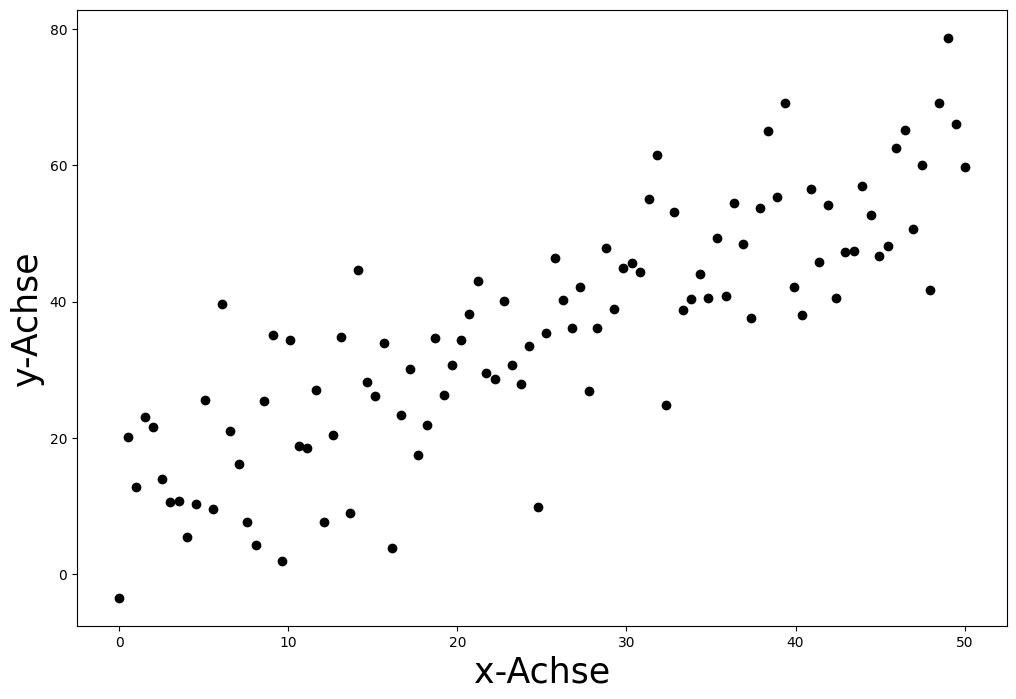

In [7]:
x = np.array([0.0, 0.51, 1.01, 1.52, 2.02, 2.53, 3.03, 3.54, 4.04, 4.55, 5.05, 5.56, 6.06, 6.57, 7.07, 7.58, 8.08, 8.59, 9.09, 9.6, 10.1, 10.61, 11.11, 11.62, 12.12, 12.63, 13.13, 13.64, 14.14, 14.65, 15.15, 15.66, 16.16, 16.67, 17.17, 17.68, 18.18, 18.69, 19.19, 19.7, 20.2, 20.71, 21.21, 21.72, 22.22, 22.73, 23.23, 23.74, 24.24, 24.75, 25.25, 25.76, 26.26, 26.77, 27.27, 27.78, 28.28, 28.79, 29.29, 29.8, 30.3, 30.81, 31.31, 31.82, 32.32, 32.83, 33.33, 33.84, 34.34, 34.85, 35.35, 35.86, 36.36, 36.87, 37.37, 37.88, 38.38, 38.89, 39.39, 39.9, 40.4, 40.91, 41.41, 41.92, 42.42, 42.93, 43.43, 43.94, 44.44, 44.95, 45.45, 45.96, 46.46, 46.97, 47.47, 47.98, 48.48, 48.99, 49.49, 50.0])
y = np.array([-3.48, 20.17, 12.78, 23.06, 21.52, 13.94, 10.56, 10.65, 5.38, 10.21, 25.59, 9.61, 39.67, 21.02, 16.13, 7.6, 4.33, 25.42, 35.1, 1.88, 34.31, 18.73, 18.51, 26.95, 7.58, 20.37, 34.78, 8.97, 44.6, 28.24, 26.14, 33.99, 3.82, 23.37, 30.17, 17.5, 21.82, 34.72, 26.28, 30.62, 34.4, 38.22, 43.02, 29.48, 28.63, 40.06, 30.67, 27.94, 33.43, 9.84, 35.35, 46.46, 40.22, 36.08, 42.13, 26.82, 36.05, 47.85, 38.97, 44.88, 45.72, 44.38, 55.0, 61.47, 24.86, 53.09, 38.8, 40.35, 44.04, 40.58, 49.35, 40.79, 54.52, 48.46, 37.59, 53.79, 65.09, 55.38, 69.11, 42.07, 38.07, 56.58, 45.87, 54.19, 40.56, 47.22, 47.46, 56.92, 52.75, 46.69, 48.16, 62.51, 65.22, 50.7, 60.1, 41.77, 69.17, 78.74, 66.13, 59.73])

plt.figure(figsize=(12,8))
plt.scatter(x,y, color='black')
plt.xlabel('x-Achse', fontsize=25)
plt.ylabel('y-Achse', fontsize=25)
plt.show()

Das Modell kann dann mit `.fit` an diese Daten angepasst werden. Hier muss beachtet werden, dass die x-Werte für die Nutzung in diesem Paket in eine andere Form mit `.reshape()` gebracht werden müssen. Die Daten bleiben dabei aber dieselben:

In [8]:
trainiertes_modell = modell.fit(x.reshape(-1, 1), y)

Haben wir nun einen neuen Datenpunkt, also wollen wir zum Beispiel wissen, welcher y-Wert bei x-Wert 20 herauskommt, so können wir `.predict()` nutzen:

In [9]:
x_wert = 20
vorhersage = trainiertes_modell.predict(np.array(x_wert).reshape(-1, 1))

print('Bei x-Wert',x_wert,'erwarten wir den y-Wert', round(vorhersage[0],2))

Bei x-Wert 20 erwarten wir den y-Wert 30.64


Diese Funktion können wir dann ausnutzen, um uns den linearen Fit tatsächlich anzeigen zu lassen:

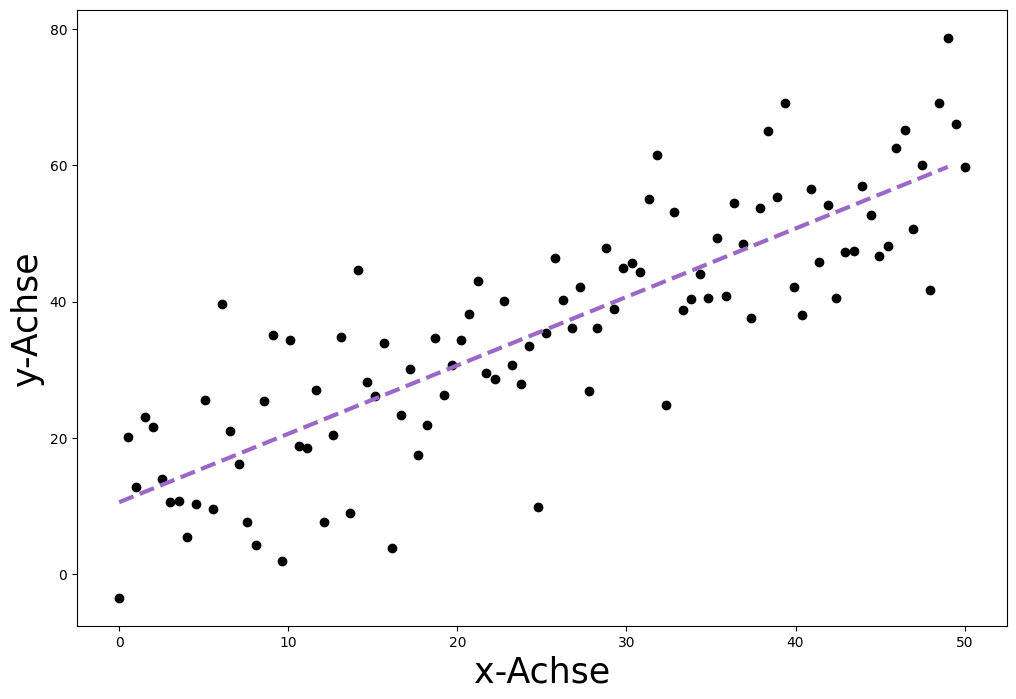

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(x,y, color='black')

x_werte = np.arange(min(x), max(x))
y_werte = trainiertes_modell.predict(x_werte.reshape(-1, 1))
plt.plot(x_werte,y_werte, color='#9C68C8', ls='--',lw=3)

plt.xlabel('x-Achse', fontsize=25)
plt.ylabel('y-Achse', fontsize=25)
plt.show()

Wir können auch die Parameter $m$ und $c$ ausgeben lassen: 

In [11]:
m_fitted = trainiertes_modell.coef_[0]    # Steigung
c_fitted = trainiertes_modell.intercept_  # y-Achsenabschnitt

print('Steigung m =', round(m_fitted,2))
print('y-Achsenabschnitt c =', round(c_fitted,2))

Steigung m = 1.0
y-Achsenabschnitt c = 10.54


**<span style="color: #EB6ECB;">Aufgabe 8.3:</span>** *Jetzt bist du dran! Unten stehen die Daten für unser Haarwachsmodell. Nutze deine neu erlernten Fähigkeiten, um eine Gerade an unsere Daten zu fitten. Nutze Matplotlib, um die Linie zu dem Plot hinzuzufügen. Gib dann die Steigung $m$ und den y-Achsenabschnitt des Modells aus. Sind die Werte ähnlich zu dem, was du in Aufgabe 8.2 erhalten hast?*

Steigung m = 1.25
y-Achsenabschnitt c = 0.97


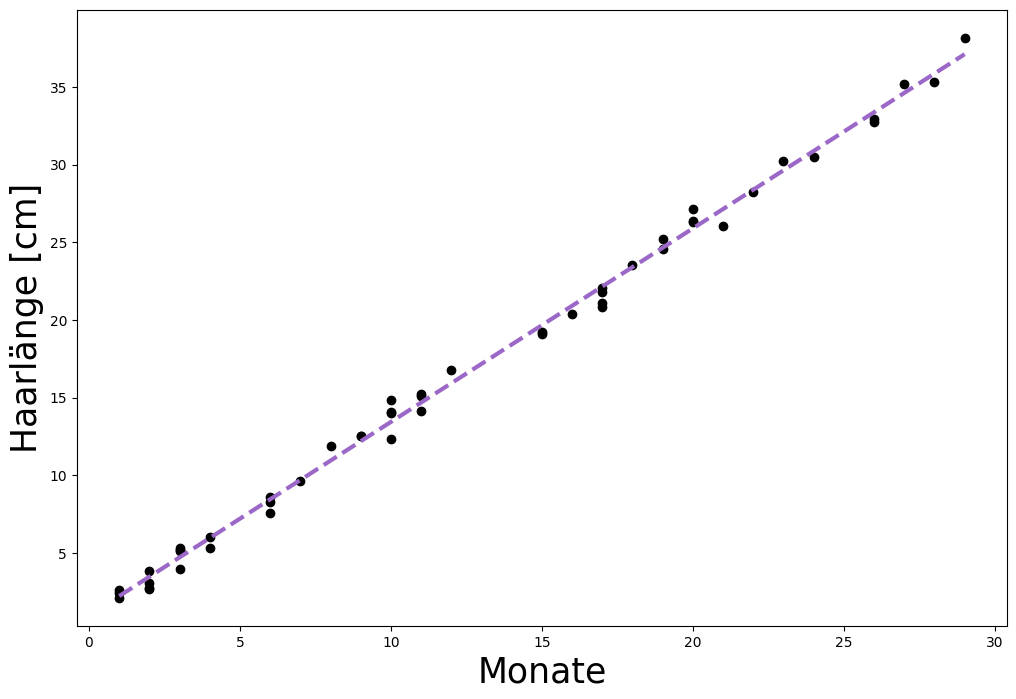

In [12]:
# Musterlösung

monat = np.array([1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 6, 6, 6, 7, 8, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 15, 15, 16, 17, 17, 17, 17, 18, 19, 19, 20, 20, 20, 21, 22, 23, 24, 26, 26, 27, 28, 29])
haarlänge = np.array([2.44, 2.59, 2.11, 2.71, 2.64, 3.09, 3.84, 3.96, 5.12, 5.17, 5.33, 5.34, 6.02, 7.57, 8.25, 8.57, 9.64, 11.9, 12.51, 12.53, 12.34, 14.01, 14.05, 14.85, 14.15, 15.1, 15.21, 16.75, 19.12, 19.25, 20.38, 20.83, 21.07, 21.79, 22.06, 23.56, 24.56, 25.23, 26.32, 26.38, 27.15, 26.07, 28.21, 30.2, 30.51, 32.72, 32.94, 35.19, 35.3, 38.17])

modell = LinearRegression(fit_intercept=True)

haarwachsmodell = modell.fit(monat.reshape(-1, 1), haarlänge)

m_fitted = haarwachsmodell.coef_[0]    # Steigung
c_fitted = haarwachsmodell.intercept_  # y-Achsenabschnitt

print('Steigung m =', round(m_fitted,2))
print('y-Achsenabschnitt c =', round(c_fitted,2))

x_range = np.linspace(min(monat), max(monat),50).reshape(-1, 1)
haarwachsmodell.predict(x_range)

plt.figure(figsize=(12,8))
plt.scatter(monat, haarlänge, color='black')

x_werte = np.arange(min(x), max(x))
y_werte = haarwachsmodell.predict(x_werte.reshape(-1, 1))
plt.plot(x_range, haarwachsmodell.predict(x_range), color='#9C68C8', ls='--',lw=3)

plt.xlabel('Monate', fontsize=25)
plt.ylabel('Haarlänge [cm]', fontsize=25)
plt.show()

## <span style="color: #9C68C8;">Lineare Klassifikation</span>
Neben der Regression kann man durch das Einzeichnen von Linien genauso Punkte klassifizieren. Haben wir verschiedene Gruppen oder Cluster in einer Punktwolke, so können wir durch das Einzeichnen einer Linie diese Gruppen voneinander trennen. Schauen wir uns das folgende Beispiel an: 

<center><img src="https://cdn.githubraw.com/starcodecourses/Python-KI/PythonKI-V2/_starcode_Pythonkurs_Visuals/linear_classification.png" width="800" /></center> 

Die Punkte in dem obigen Plot können für verschiedene Sachen stehen. Zum Beispiel könnten wir uns den Dichte/Durchmesser Plot für Planeten anschauen. In diesem Fall würden die beiden Gruppen für die Gesteinsplaneten und die Gasplaneten stehen. Haben wir jetzt einen neuen Punkt (hier in Rot), zum Beispiel weil jemand bei seiner Forschung einen neuen Planeten entdeckt hat, dann können wir durch das Einzeichnen dieses Datenpunktes erfahren, zu welcher Gruppe der Planet gehört!

Ein beliebter Algorithmus, um diesen Prozess durchzuführen, ist die *Support Vector Machine* (SVM). Im Grunde funktioniert das Ganze ein bisschen wie der Algorithmus zur linearen Regression, nur dass der Abstand der beiden Kategorien zu der Linie maximiert wird. Wir schauen uns das Ganze im Schnelldurchlauf am Beispiel der Planeten an. In den nächsten Wochen werden wir uns noch ausführlicher mit der Klassifikation beschäftigen. Zu der Klassifikation brauchen wir die uns von Woche 5 bekannten Durchmesser und Dichten der Planeten und noch eine zusätzliche Liste mit den Klassen der Planeten:

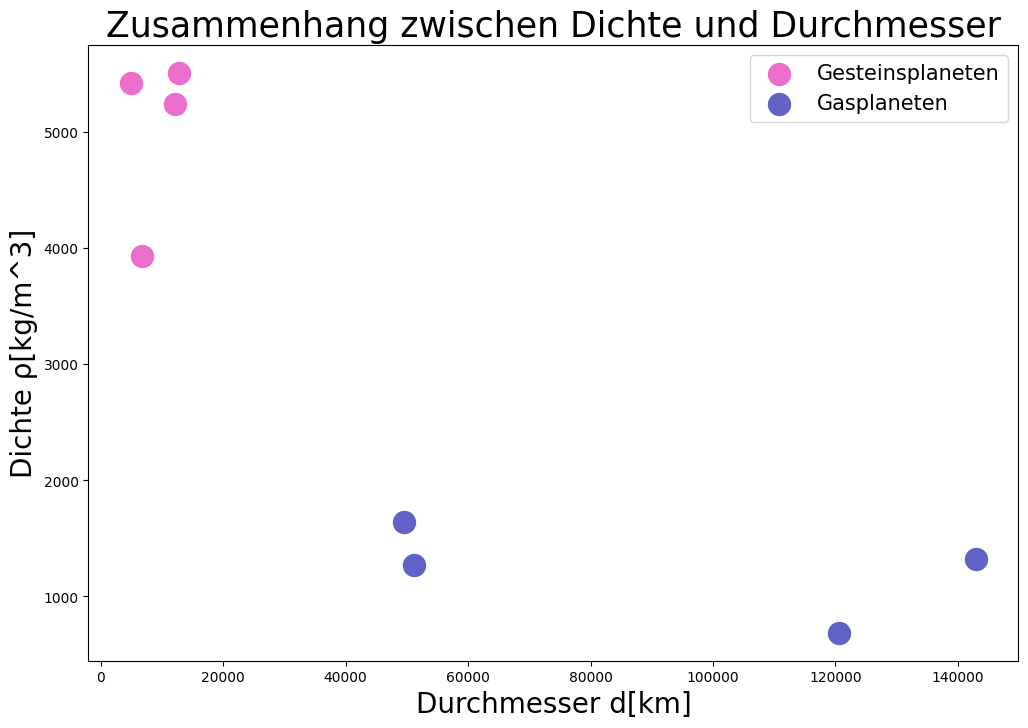

In [13]:
# Reihenfolge: Merkur, Venus, Erde, Mars, Jupiter, Saturn, Uranus, Neptun
Durchmesser = [4879, 12104, 12756, 6792, 142984, 120536, 51118, 49528] # in km
Dichte      = [5429, 5243, 5514, 3934, 1326, 687, 1270, 1638]          # in kg/m^3
planet_typ  = ['Gesteinsplanet', 'Gesteinsplanet', 'Gesteinsplanet', 'Gesteinsplanet', 'Gasplanet', 'Gasplanet', 'Gasplanet', 'Gasplanet']

plt.figure(figsize=(12,8))
plt.scatter(Durchmesser[:4], Dichte[:4], marker='o', s=250, color='#EB6ECB', label='Gesteinsplaneten')
plt.scatter(Durchmesser[4:], Dichte[4:], marker='o', s=250, color='#6162C5', label='Gasplaneten')
plt.title('Zusammenhang zwischen Dichte und Durchmesser', fontsize=25)
plt.xlabel('Durchmesser d[km]', fontsize=20)
plt.ylabel('Dichte ρ[kg/m^3]', fontsize=20)
plt.legend(fontsize=15)
plt.show()

Nun können wir die benötigte Klasse importieren, uns das Modell definieren:

In [14]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')

Wie zuvor werden nun unsere Daten an das Modell mit `.fit()` gefittet. Allerdings ist hier der Input ein bisschen anders. Als ersten Eingabewert geben wir eine Zusammenfügung der `Durchmesser` und `Dichte` Arrays ein. Der zweite Eingabewert ist dann unsere Liste mit der jeweiligen Klassifikation:

In [15]:
svm.fit(np.vstack((Durchmesser, Dichte)).reshape(-1, 2), planet_typ)

SVC(kernel='linear')

Nun können wir wie zuvor unsere Steigung $w$ und den y-Achsenabschnitt $c$ erhalten. In unserem Fall müssen wir das Ganze allerdings nochmal durch den Wert, der in `w[1]` gespeichert ist, teilen, um die tatsächlichen Werte zu erhalten:

In [16]:
w = svm.coef_[0]
c = svm.intercept_[0]

print('Steigung m =', round(w[0]/w[1],2))
print('y-Achsenabschnitt c =', round(c/w[1],2))

Steigung m = 0.67
y-Achsenabschnitt c = -12148.32


Das heißt, dass wir nun diese Gerade in unser Graph einzeichnen können, um die Klassifikation der Daten zu erhalten:

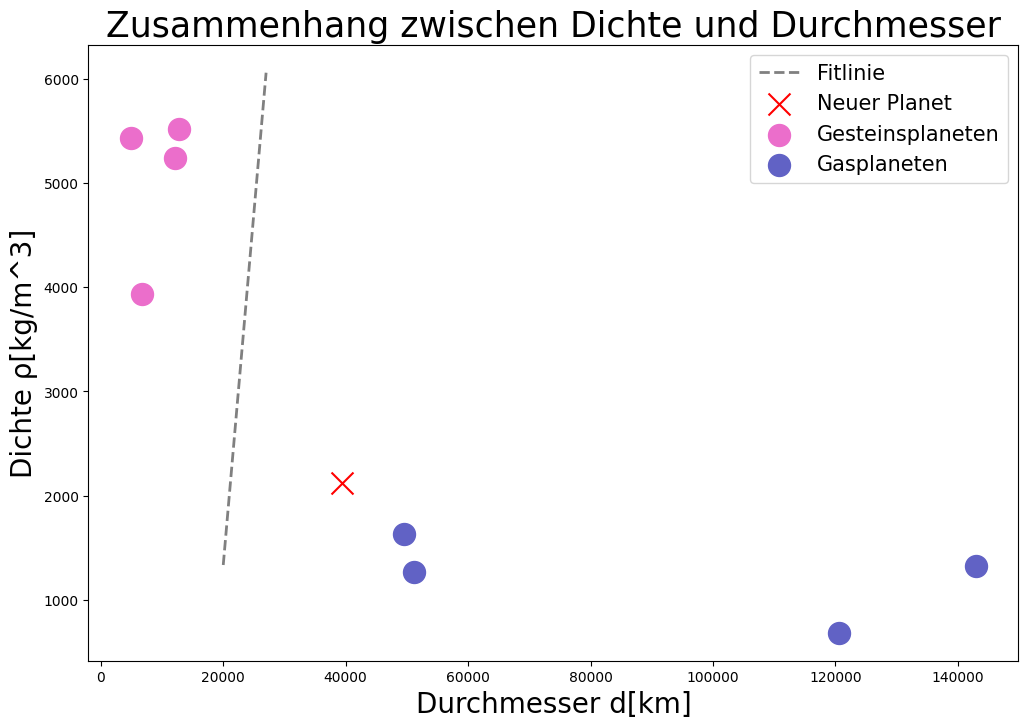

In [17]:
x_visual = np.linspace(20000,27000)
y_visual = (w[0] / w[1]) * x_visual + (c / w[1])

plt.figure(figsize=(12,8))

plt.plot(x_visual, y_visual, color='gray', lw=2, ls='--', label='Fitlinie')

plt.scatter(39348, 2120, marker='x', s=250, color='red', label='Neuer Planet')

plt.scatter(Durchmesser[:4], Dichte[:4], marker='o', s=250, color='#EB6ECB', label='Gesteinsplaneten')
plt.scatter(Durchmesser[4:], Dichte[4:], marker='o', s=250, color='#6162C5', label='Gasplaneten')
plt.title('Zusammenhang zwischen Dichte und Durchmesser', fontsize=25)
plt.xlabel('Durchmesser d[km]', fontsize=20)
plt.ylabel('Dichte ρ[kg/m^3]', fontsize=20)
plt.legend(fontsize=15)
plt.show()

**<span style="color: #EB6ECB;">Aufgabe 8.4:</span>** *Du bist eine Astronomin und hast nach langer Suche einen neuen Planeten entdeckt! Du hast herausgefunden, dass der Planet einen Durchmesser von $39348~km$ hat und eine Dichte von $2120~kg/m^3$ hat. Der Planet ist im oberen Plot durch das rote X markiert. Ist dieser Planet ein Gesteinsplanet oder ein Gasplanet?*

&emsp;→ *Der Planet ist wahrscheinlich ein Gasplanet, da er sich rechts von der Linie befindet.*

## <span style="color: #9C68C8;">Zusammenfassung</span>

Heute haben wir den Unterschied zwischen Regression und Klassifikation gelernt. Dabei haben wir zwei der im Prinzip einfachsten Methoden kennengelernt: Lineare Regression und Klassifikation durch SVMs!

**<span style="color: #EB6ECB;">Aufgabe Z8:</span>** *Unten sind ein paar Probleme, die wir mithilfe von maschinellem Lernen knacken können. Diskutiert in der Gruppe, ob es sich dabei um Klassifikations- oder Regressionsaufgaben handelt:*

1. **Temperaturvorhersage:** *Basierend auf den Temperaturmessungen der vergangenen Tage, soll die Maschine vorhersagen, welche Temperatur Morgen wahrscheinlich ist.* <br>
&emsp;→ ***Regression**  Anhand vergangener Temperaturen sollen Werte, also die zukünftigen Temperaturen, vorhergesagt werden.*

2. **Spambekämpfung:** *Anhand des Inhalts einer E-Mail soll entschieden werden, ob es sich um eine legitime Nachricht handelt.*<br>
&emsp;→ ***Klassifikation** Der Text der E-Mail soll in 'Spam' oder 'nicht Spam' klassifiziert werden.*

3. **Wettervorhersage:** *Basierend auf historischen Daten wie Temperatur, Luftfeuchtigkeit und Windgeschwindigkeit, soll die Maschine vorhersagen, ob es morgen regnen wird.*<br>
&emsp;→ ***Klassifikation** Da wir hier nur vorhersagen wollen, ob es regnet oder nicht, handelt es sich hierbei um eine Klassifikationsaufgabe.*

4. **Verkaufsprognose:** *Basierend auf historischen Verkaufszahlen will der Pizzabäcker deines Vertrauens wissen, wie viele Pizzen er im nächsten Monat verkaufen wird.* <br>
&emsp;→ ***Regression** Wir versuchen Werte, also die Verkaufszahlen, vorherzusagen.*

5. **Filmempfehlungen:** *Basierend auf den Vorlieben eines Benutzers (Genre, Schauspieler, Regisseur) soll die Maschine Filme vorschlagen, die der Benutzer wahrscheinlich mögen wird.*<br>
&emsp;→ ***Regression/Klassifikation** Je nach Herangehensweise kann dies eine Klassifikationsaufgabe sein (z. B. Filmgenre zuordnen) und/oder eine Regressionsaufgabe (z. B. Bewertung des Benutzers vorhersagen).*

6. **Medizinische Diagnose** *Gegeben sind Patientendaten wie Blutdruck, Cholesterinspiegel und Gewicht. Entscheide, ob der Patient an einer bestimmten Krankheit leidet.*<br>
&emsp;→ ***Klassifikation** Anhand von Patientendaten wird dem Patienten eine Diagnose gegeben und somit wird der Patient einer Gruppe zugeteilt.*